## 排序
给定一个数组，请你编写一个函数，返回该数组排序后的形式
### 1.快速排序
find a random element, which should be exhanged with the last element; And what we want is divide the array into 2 array -- before and after, in which the data of the first array should be smaller than the data of the latter one. 

And recrusively call the function to quick sort the 2 array, and at last we will get a entirely ordered array.

In [9]:
# @param arr int整型一维数组 待排序的数组
# @return int整型一维数组
#
import random
class Solution:
    def MySort(self , arr ):
        self.randomQuicksort(arr, 0, len(arr)-1)
        return arr
    
    def randomPartition(self, arr, l, r):
        pivot = random.randint(l, r)
        arr[pivot], arr[r] = arr[r], arr[pivot]
        i = l - 1
        for j in range(l, r):
            if arr[j] < arr[r]:
                i += 1
                arr[j], arr[i] = arr[i], arr[j]
        i += 1
        arr[i], arr[r] = arr[r], arr[i]
        return i
    
    def randomQuicksort(self, arr, l, r):
        if l >= r:
            return
        mid = self.randomPartition(arr, l, r)
        self.randomQuicksort(arr, l, mid-1)
        self.randomQuicksort(arr, mid+1, r)

In [10]:
ss = Solution()
nums = [20,24,15,12,1,2,3,54,6]
ss.MySort(nums)
print(nums)

[1, 2, 3, 6, 12, 15, 20, 24, 54]


### 2.归并排序
归并排序是把待排序序列分为若干个子序列，每个子序列是有序的。然后再把有序子序列合并为整体有序序列
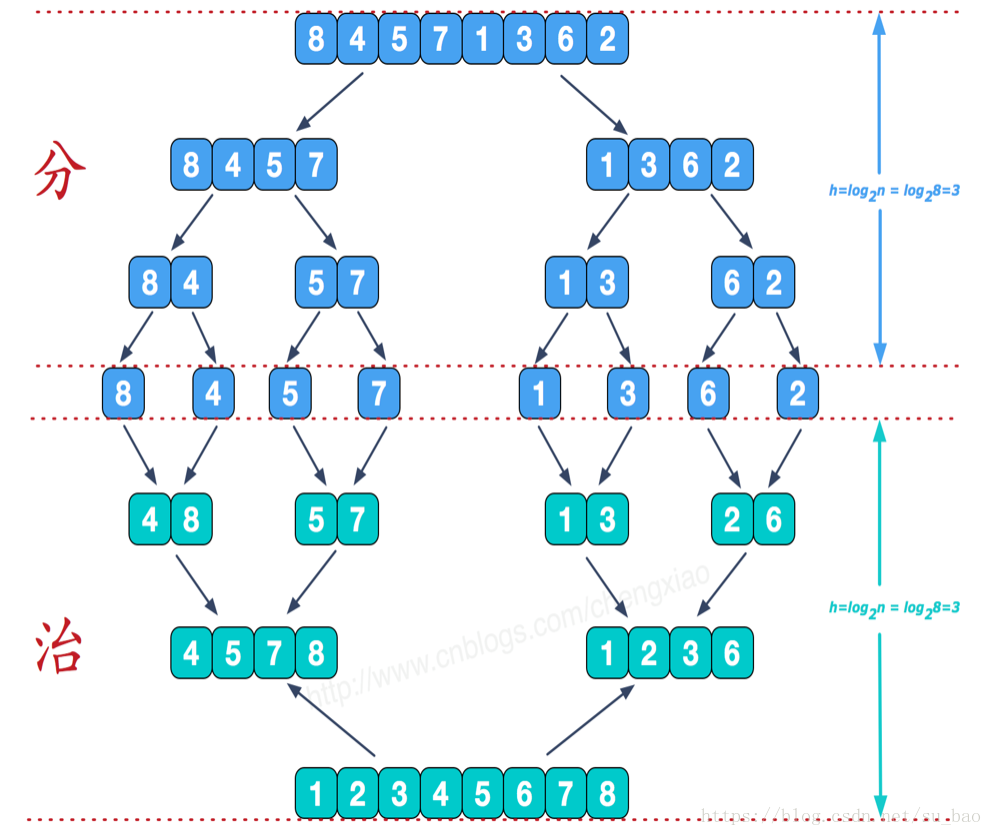


In [37]:
# @param arr int整型一维数组 待排序的数组
# @return int整型一维数组
class Solution:
    def MySort(self , arr ):
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        return self.merge(self.MySort(arr[:mid]), self.MySort(arr[mid:]))
    
    def merge(self, left, right):
        result = []
        while len(left) >0 and len(right) > 0:
            if left[0] <= right[0]:
                result.append(left.pop(0))
            else:
                result.append(right.pop(0))
        result += left
        result += right
        return result

In [38]:
ss = Solution()
nums = [20,24,15,12,1,2,3,54,6]
nums = ss.MySort(nums)
print(nums)

[1, 2, 3, 6, 12, 15, 20, 24, 54]


python有一个模块，专门提供了归并排序的方法，叫做“heapq”模块，因此我们只要将分解后的结果导入该方法即可

In [40]:
from heapq import merge

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    return list(merge(arr[:mid], arr[mid:]))

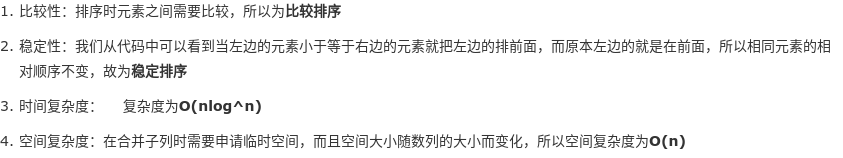

### 3.堆排序
（1）堆树是一颗完全二叉树；

（2）堆树中某个节点的值总是不大于或不小于其孩子节点的值；

（3）堆树中每个节点的子树都是堆树。

最大堆： 堆中的最大值总是位于根节点（在优先队列中使用最小堆：堆中的最小值位于根节点）


In [49]:
from typing import List
def build(arr:List[int], root, end):
    while True:
        child = 2 * root + 1 # 左子节点的位置
        if child > end: # 若左子节点超过了最后一个节点，则终止循环
            break
        if (child + 1 <= end) and (arr[child + 1] > arr[child]): # 若右子节点在最后一个节点之前，并且右子节点比左子节点大，则我们的孩子指针移到右子节点上
            child += 1
        if arr[child] > arr[root]: # 若最大的孩子节点大于根节点，则交换两者顺序，并且将根节点指针，移到这个孩子节点上
            arr[child], arr[root] = arr[root], arr[child]
            root = child
        else:
            break

def heap_sort(arr:List[int]):
    n = len(arr)
    first_root = n // 2 - 1 # 确认最深最后的那个根节点的位置
    for root in range(first_root, -1, -1): # 由后向前遍历所有的根节点，建堆并进行调整
        build(arr, root, n - 1)
    print("建堆数组：", arr)
        
    for end in range(n - 1, 0, -1): # 调整完成后，将堆顶的根节点与堆内最后一个元素调换位置，此时为数组中最大的元素，然后重新调整堆，将最大的元素冒到堆顶。依次重复上述操作
        arr[0], arr[end] = arr[end], arr[0]
        build(arr, 0, end - 1)
        
if __name__ == "__main__":
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("原始数据：", arr)
    heap_sort(arr)
    print("堆排序结果：", arr)

原始数据： [17, 56, 71, 38, 61, 62, 48, 28, 57, 42]
建堆数组： [71, 61, 62, 57, 56, 17, 48, 28, 38, 42]
堆排序结果： [17, 28, 38, 42, 48, 56, 57, 61, 62, 71]


### 4.插入排序(Insertion Sort)
对于未排序数据，在已排序序列中从后向前扫描，找到相应位置并插入
#### 实现步骤
- 从第一个元素开始，该元素可以认为已经被排序；
- 取出新元素，在已经排序的元素序列中（新元素之前的序列），从后向前扫描；
- 如果已排序序列中的元素大于新元素，将已排序的元素后移；
- 重复步骤3，直到找到已排序的元素小于或者等于新元素的位置；
- 将新元素插入到该位置后一位；
- 重复步骤2~5。

In [56]:
from typing import List

def insertion_sort(arr: List[int]):
    """
    插入排序
    :param arr: 待排序List
    :return: 插入排序是就地排序(in-place)
    """
    length = len(arr)
    if length <= 1:
        return
    
    for i in range(1, length):
        value = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > value:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = value

![gif](https://image-static.segmentfault.com/961/819/961819017-5ec37259eaa75_fix732)
- 时间复杂度

如果数据初始是顺序的，只需要外循环n-1次，每次进行一次比较，无需移动元素，即可完成 -- 入排序最好的时间复杂度为$O\left( n \right)$。

如果数据初始是逆序的，则需要进行$n-1$趟排序，每次排序中待插入的元素都要和$\left[ 0,i-1 \right]$中的$i$个元素进行比较，并将这$i$个元素后移$i$次，每趟移动次数为$i+2$

平均时间复杂度为$O\left( n^2 \right)$

- 空间复杂度

空间复杂度就是在交换元素时那个临时变量所占的内存空间，与数据规模无关，空间复杂度为$O\left( 1 \right)$

- 稳定性

排序过程中，相同元素的相对位置保持不变，所以插入排序属于稳定排序。

### 5.冒泡排序


In [2]:
from typing import List

def bubbleSort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return 
    for i in range(len(arr)):
        is_made_swap = False
        for j in range(len(arr)-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                is_made_swap = True
        if not is_made_swap:
            break

### 6.选择排序
首先在未排序序列中找到最小（大）元素，存放到排序序列的起始位置，然后，再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾。

选择排序的主要优点与数据移动有关。
- 如果某个元素位于正确的最终位置上，则它不会被移动。
- 选择排序每次交换一对元素，它们当中至少有一个将被移到其最终位置上，因此对n个元素的表进行排序总共进行至多n-1次交换。
- 在所有的完全依靠交换去移动元素的排序方法中，选择排序属于非常好的一种。

In [8]:
def selectSort(arr):
    for j in range(0, len(arr)-1):
        min_idx = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[min_idx]:
                min_idx = i
        if j != min_idx:
            arr[min_idx], arr[j] = arr[j], arr[min_idx] 

In [9]:
if __name__ == '__main__':
    alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
    print("原列表为：%s" % alist)
    selectSort(alist)
    print("新列表为：%s" % alist)

原列表为：[54, 26, 93, 17, 77, 31, 44, 55, 20]
新列表为：[17, 20, 26, 31, 44, 54, 55, 77, 93]


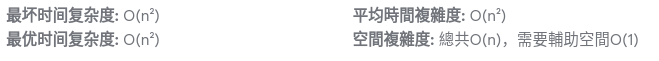

## 7.计数排序
计数排序(Counting Sort)不是基于比较的排序算法，其核心在于将输入的数据值转化为键存储在额外开辟的数组空间中

一种线性时间复杂度的排序， 要求输入的数据必须是有确定范围的整数

基本思想是：给定的输入序列中的每一个元素x，确定该序列中值小于等于x元素的个数，然后将x直接存放到最终的排序序列的正确位置上。

### 算法实现步骤
- 根据待排序集合中最大元素和最小元素的差值范围，申请额外空间；
- 遍历待排序集合，将每一个元素出现的次数记录到元素值对应的额外空间内；
- 对额外空间内数据进行计算，得出每一个元素的正确位置；
- 将待排序集合每一个元素移动到计算得出的正确位置上

In [8]:
from typing import List
    
def counting_sort(arr:List[int]):
    ma=mi=0
    mi = min(arr)
    ma = max(arr)
    count = [0] * (ma-mi+1)
    for index in arr:
        count[index-mi] += 1
    idx = 0
    for i in range(ma-mi+1):
        for j in range(count[i]):
            arr[idx] = i+mi
            idx += 1
    
if __name__ == '__main__':
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("原始数据：", arr)
    counting_sort(arr)
    print("计数排序结果", arr)

原始数据： [17, 56, 71, 38, 61, 62, 48, 28, 57, 42]
计数排序结果 [17, 28, 38, 42, 48, 56, 57, 61, 62, 71]


## 8. 桶排序(Bucket Sort)

将待排序集合中处于同一个值域的元素存入同一个桶中, 从值域上看是处于有序状态的。

**对每个桶中元素进行排序，则所有桶中元素构成的集合是已排序的 **

桶排序是计数排序的扩展版本，计数排序可以看成每个桶只存储相同元素，而桶排序每个桶存储一定范围的元素

### 实现步骤
- 根据待排序集合中最大元素和最小元素的差值范围和映射规则，确定申请的桶个数；
- 遍历排序序列，将每个元素放到对应的桶里去；
- 对不是空的桶进行排序；
- 按顺序访问桶，将桶中的元素依次放回到原序列中对应的位置，完成排序。

In [12]:
from typing import List

def bucket_sort(arr:List[int]):
    ma, mi = max(arr), min(arr)
    bucket_range = (ma-mi)/len(arr)
    count_list = [[] for i in range(len(arr)+1)]
    for i in arr:
        count_list[int((i-mi)//(bucket_range))].append(i)
    arr.clear()
    for i in count_list:
        for j in sorted(i):
            arr.append(j)

if __name__ == '__main__':
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("原始数据：", arr)
    bucket_sort(arr)
    print("桶排序结果：", arr)

原始数据： [17, 56, 71, 38, 61, 62, 48, 28, 57, 42]
[[17], [], [28], [38], [42], [48], [], [56, 57], [61, 62], [71], []]
桶排序结果： [17, 28, 38, 42, 48, 56, 57, 61, 62, 71]


## 8.基数排序(Radix Sort)

将所有待比较数值统一为同样的数位长度，数位较短的数前面补零。按照低位先排序，分别放入10个队列中

## 88. 合并两个有序数组
给你两个有序整数数组 nums1 和 nums2，请你将 nums2 合并到 nums1 中，使 nums1 成为一个有序数组。

初始化 nums1 和 nums2 的元素数量分别为 m 和 n 。你可以假设 nums1 的空间大小等于 m + n，这样它就有足够的空间保存来自 nums2 的元素。

示例 1：
```
输入：nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
输出：[1,2,2,3,5,6]
```
示例 2：
```
输入：nums1 = [1], m = 1, nums2 = [], n = 0
输出：[1]
 ```

提示：
```
nums1.length == m + n
nums2.length == n
0 <= m, n <= 200
1 <= m + n <= 200
-109 <= nums1[i], nums2[i] <= 109
```


 ### 方法一：快速排序

**主要思想**：

通过划分将待排序的序列分成前后两部分，其中前一部分的数据都比后一部分的数据要小
然后再递归调用函数对两部分的序列分别进行快速排序，以此使整个序列达到有序

**基本思路：**

我们定义函数` randomized_quicksort(nums, l, r)` 为对 `nums `数组里 `[l,r]` 的部分进行排序
每次先调用 `randomized_partition` 划分函数对 `nums `数组里 `[l,r]` 的部分进行划分，并返回**分界值的下标** `pos`
然后按上述将的递归调用`randomized_quicksort(nums, l, pos - 1) `和 `randomized_quicksort(nums, pos + 1, r)` 即可。

**核心：划分函数的实现**

划分函数一开始需要确定一个分界值（主元 `pivot)`，然后再进行划分。
主元的选取有很多种方式，这里我们采用随机的方式，对当前划分区间 `[l,r]` 里的数**等概率随机**一个作为我们的主元，再将主元放到区间末尾，进行划分。

整个划分函数 `partition `主要涉及两个指针 `i` 和 `j`，一开始` i = l - 1，j = l`。
我们需要实时维护两个指针使得任意时候，对于任意数组下标 `k`，我们有如下条件成立：
![image.png](attachment:image.png)
我们每次移动指针 `j`，如果 ${nums}[j]> pivot$，我们只需要继续移动指针 `j` ，即能使上述三个条件成立
否则我们需要将指针 `i` 加一，然后交换$ {nums}[i]$ 和 ${nums}[j]$，再移动指针 `j` 才能使得三个条件成立。

当 `j` 移动到 `r-1` 时结束循环，此时我们可以由上述三个条件知道 `[l,i]` 的数都小于等于主元 `pivot`，``[i+1,r-1]` 的数都大于主元 `pivot`
那么我们只要交换 ${nums}[i+1]$和  $ {nums}[r]$ ，即能使得 `[l,i+1]` 区间的数都小于 `[i+2,r]` 区间的数，完成一次划分，且分界值下标为` i+1`，返回即可。

**复杂度分析**

时间复杂度：基于随机选取主元的快速排序时间复杂度为期望$ O((m+n)\log (m+n))$

空间复杂度：$O(h)$,  其中 $h$  为快速排序递归调用的层数,  最坏情况下需 $O((m+n))$ 的空间,   最优情况下每次都平衡,  空间复杂度为 $O(\log (m+n))$。

In [1]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        nums1 = nums1[:m] + nums2
        self.randomized_quicksort(nums1, 0, len(nums1)-1)
        return nums1
    
    def randomized_partition(self, nums: List[int], l:int, r:int):
        import random as rd
        pivot = rd.randint(l,r)
        nums[pivot], nums[r] = nums[r], nums[pivot]
        i = l - 1
        for j in range(l, r):
            if nums[j] < nums[r]:
                i += 1
                nums[j], nums[i] = nums[i], nums[j]
        i += 1
        nums[i], nums[r] = nums[r], nums[i]
        return i
    def randomized_quicksort(self, nums: List[int], l: int, r: int):
        if l >= r:
            return
        mid = self.randomized_partition(nums, l, r)
        self.randomized_quicksort(nums, l, mid-1)
        self.randomized_quicksort(nums, mid+1, r)

#### 直接合并后排序
复杂度同快速排序
```python
nums1[m:] = nums2
nums1.sort()
```

### 双指针

**复杂度分析**

时间复杂度：$O(m+n)$
指针移动单调递增，最多移动 $m+n$ 次，因此时间复杂度为 $O(m+n)$。

空间复杂度：$O(m+n)$
需要建立长度为 $m+n$ 的中间数组 $\textit{sorted}$。


In [ ]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        sorted = []
        p1, p2 = 0, 0
        while p1 < m or p2 < n:
            if p1 == m:
                sorted.append(nums2[p2])
                p2 += 1
            elif p2 == n:
                sorted.append(nums1[p1])
                p1 += 1
            elif nums1[p1] < nums2[p2]:
                sorted.append(nums1[p1])
                p1 += 1
            else:
                sorted.append(nums2[p2])
                p2 += 1
        nums1[:] = sorted  

### 逆向双指针
算法

方法二中，之所以要使用临时变量，是因为如果直接合并到数组 $\textit{nums}_1$中，$\textit{nums}_1$中的元素可能会在取出之前被覆盖。那么如何直接避免覆盖 $\textit{nums}_1$中的元素呢？观察可知，$\textit{nums}_1$的后半部分是空的，可以直接覆盖而不会影响结果。因此可以指针设置为从后向前遍历，每次取两者之中的较大者放进 $\textit{nums}_1$的最后面。

**复杂度分析**

时间复杂度：$O(m+n)$
指针移动单调递增，最多移动 $m+n$ 次，因此时间复杂度为 $O(m+n)$。

空间复杂度：$O(1)$

In [ ]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        p1, p2 = m-1, n-1
        tail = m + n -1
        while p1 > -1 or p2 > -1:
            if p1 == -1:
                nums1[tail] = nums2[p2]
                p2 -= 1
            elif p2 == -1:
                nums1[tail] = nums1[p1]
                p1 -= 1
            elif nums1[p1] > nums2[p2]:
                nums1[tail] = nums1[p1]
                p1 -= 1
            elif nums2[p2] >= nums1[p1]:
                nums1[tail] = nums2[p2]
                p2 -= 1
            tail -= 1

In [3]:
ss = Solution()
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3
ss.merge(nums1, m, nums2, n)
print(nums1)

[1, 2, 3, 0, 0, 0]
